# Peron and Irigoyen: 
## Using Text Analysis to Investigate Democratic and Authoritarian Populism
#### by Casey Li

In [2]:
from datascience import *
import numpy as np  

## Cleaning the data

In [3]:
# importing the data
# text OCR'd from the University of Texas' Latin American Network Information Center
speeches = Table.read_table('spanish-presidents.csv')
speeches

Speaker,Book_Title,Page,Text
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-69,"ción, que complementaron los convenios, para ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-15,"ideales, y las antiguas promesas repetidas, con la pre— ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-12,= Ps o y © o YT p p l— pósitos que la Revolu ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-60,distintos planes crediticios del Banco Hipotecario Na— ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-67,Ella se ha desarrollado ya como teoría normativa ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-83,". Sobre este tema he expresado últimamente, en va— rias ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-52,Hay que tener en cuenta que estos índices por ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-3,CAPITULO I INTRODUCCIO N ESTADO GENERAL DE LA NACION ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-29,no tiene por el momento más que dos grandes sector ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-84,"_1o) Cuando el obrero está mejor capacitado, porque ..."


In [4]:
peron = speeches.where('Speaker', 'Peron')
peron

Speaker,Book_Title,Page,Text
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-69,"ción, que complementaron los convenios, para ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-15,"ideales, y las antiguas promesas repetidas, con la pre— ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-12,= Ps o y © o YT p p l— pósitos que la Revolu ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-60,distintos planes crediticios del Banco Hipotecario Na— ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-67,Ella se ha desarrollado ya como teoría normativa ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-83,". Sobre este tema he expresado últimamente, en va— rias ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-52,Hay que tener en cuenta que estos índices por ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-3,CAPITULO I INTRODUCCIO N ESTADO GENERAL DE LA NACION ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-29,no tiene por el momento más que dos grandes sector ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-84,"_1o) Cuando el obrero está mejor capacitado, porque ..."


In [5]:
yrigoyen = speeches.where('Speaker', 'Yrigoyen')
yrigoyen

Speaker,Book_Title,Page,Text
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-19,— 19 — pliando la capacidad de los establecimien ...
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-8,— 8 — nadas de la ...
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-17,— 17 — que nos une a to ...
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-6,...
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-1,
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-10,— 10 — En cuanto a esta Capi ...
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-59,—— 59 — Tenemos por último iniciada la ...
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-25,"— 25 — tado en 102 millones de pesos, sin t ..."
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-22,...
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,page-50,— 50 — Los contratos que se celeb ...


In [6]:
# i'm turning the 'page' column of the tables Peron and Irigoyen from this 'page-x' where x is the page number format into just 'x'
peron_page_string = ' '.join(peron.column('Page')).replace('page-', '').split()
yrigoyen_page_string = ' '.join(yrigoyen.column('Page')).replace('page-', '').split()

In [7]:
# and now I'll remake the Peron and Irigoyen tables so I have this nice new real page numbers
peron = peron.with_column('Page #', peron_page_string).drop('Page').move_to_end('Text')
peron.show(3)
yrigoyen = yrigoyen.with_column('Page #', yrigoyen_page_string).drop('Page').move_to_end('Text')
yrigoyen.show(3)

Speaker,Book_Title,Page #,Text
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,69,"ción, que complementaron los convenios, para ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,15,"ideales, y las antiguas promesas repetidas, con la pre— ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,12,= Ps o y © o YT p p l— pósitos que la Revolu ...


Speaker,Book_Title,Page #,Text
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,19,— 19 — pliando la capacidad de los establecimien ...
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,8,— 8 — nadas de la ...
Yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,17,— 17 — que nos une a to ...


In [8]:
# let's order these tables into pages in consecutive order that form books
peron = peron.sort('Page #').sort('Book_Title')
yrigoyen = yrigoyen.sort('Page #').sort('Book_Title')

In [9]:
# this gives me an array of Peron and Yrigoyen titles so that 
# I can concatenate page-strings to form one long text--the whole book
peron_titles = peron.group('Book_Title').column(0)
yrigoyen_titles = yrigoyen.group('Book_Title').column(0)

In [10]:
# Let's make the books
peron_book_texts = make_array()

for title in peron_titles:
    title_table = peron.where('Book_Title', title).sort('Page #')
    text = title_table.column('Text')
    text_in_string = ' '.join(text)
    peron_book_texts = np.append(peron_book_texts, text_in_string)

peron_books = Table().with_columns('Speaker', ['peron' for n in np.arange(len(peron_titles))], 
                                   'Title', peron_titles,
                                   'Text', peron_book_texts)
peron_books.show(17)

yrigoyen_book_texts = make_array()

for title in yrigoyen_titles:
    title_table = yrigoyen.where('Book_Title', title).sort('Page #')
    text = title_table.column('Text')
    text_in_string = ' '.join(text)
    yrigoyen_book_texts = np.append(yrigoyen_book_texts, text_in_string)

yrigoyen_books = Table().with_columns('Speaker', ['yrigoyen' for n in np.arange(len(yrigoyen_titles))],
                                      'Title', yrigoyen_titles,
                                      'Text', yrigoyen_book_texts)
yrigoyen_books

Speaker,Title,Text
peron,Constitucion nacional 1949-3,en comicios puros y por una ab ...
peron,"Discurso al proclamarse su candidatura (Feb. 12, 1946)-0",=a—.—.z——-———————.=1 C A HJ E — ...
peron,"El ideal de Mayo (July 15, 1949)-6",REPUBLICA ARGENTINA — SENADO DE LA NACION EL IDEAL D ...
peron,"Juan Peron 1973-1974 Todos sus discursos, mensajes y con ...","1, | —— 107 TODOS SUS DISCURSOS, MENSAJES Y CONFEREN ..."
peron,"Juan Peron 1973-1974 Todos sus discursos, mensajes y con ...",dAl Dy e s e nm ...
peron,Lecture - First National Congress of Philosophy (April 9 ...,— . N = — — L E C T U R E OF HIS EXCE ...
peron,Mensaje al inaugurar el Congreso nacional II. Resena ge ...,"DEL . . PERIODO, DES … 3 ea ..."
peron,Mensaje al inaugurar el Congreso nacional II. Resena ge ...,2 JUL 1 5 ___ 1955 _MEN SAJE DEL PRESIDENTE ...
peron,Mensaje al inaugurar el Congreso nacional (1948)-2,MENSAJE PRESIDENCIAL AL HONORABL ...
peron,"Mensaje al inaugurar el Congreso nacional (May 1, 1949)-5",un ns < ” 5 MENSAJE DEL PRESIDENTE DE LA NACI ...


Speaker,Title,Text
yrigoyen,Mensaje del Poder Ejecutivo 1918-0,REPÚBLICA ARGENTINA /…;¡<//—Jo ...
yrigoyen,Mensaje del Poder Ejecutivo 1919-1,e 2 —. z 1 0 < < O e cn D A. el eX ...
yrigoyen,Mensaje del Poder Ejecutivo 1920-2,Esi R REPÚBLICA ARGEN EJECUTIVO — ...
yrigoyen,Mensaje del Presidente al Abrir Las Sesiones de Congreso ...,— 10 — En cuanto a esta ...
yrigoyen,Mensajes Inaugurales del Congreso de la Nacion 1917-1929-4,eo iii ie nne e e i ie HIPÓLITO Y RIGOYEN P U ...


In [11]:
# let's take a look at some of the speeches. 
yrigoyen_books.column('Text').item(3)

" \r\n\x0c  \r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n \r\n\r\n— 10 —\r\n\r\nEn cuanto a esta Capital, se hace indispensable\r\nel aumento de personal que, reiteradamente, se ha\r\nsolicitado de V. H., así como la inmediata sanción\r\nde los proyectos sobre represión de la vagancia y\r\nregistro de vecindad, llamados a facilitar la extir—\r\npación del elemento maleante; a prevenir muchos\r\natentados, y a asegurar su castigo, si llegaran a co—\r\nmeterse.\r\n\r\nEl Poder Ejecutivo considera, pues, cumplir un\r\ndeber al reclamar de V. H. la más preferente aten—\r\nción sobre estas iniciativas que se relacionan con\r\nintereses tan importantes de seguridad y orden pú—\r\nblico, sobre todo en estos momentos en que la efi—\r\nciente acción de la Policía de la Capital la hace\r\nacreedora a la consideración del Gobierno y a la\r\nadhesión y aplauso de las representaciones más ca—\r\nlificadas de la opinión .,\r\n\r\nCORREOS Y TELEGRAFOS_\r\n\r\nLa renta postal y telegráfica correspondiente a\r\n

## Classifying time

In [12]:
# make two arrays, one of the book texts and the other of the speaker
books = np.concatenate((peron_books.column('Text'), yrigoyen_books.column('Text')))
authors = np.concatenate((peron_books.column('Speaker'), yrigoyen_books.column('Speaker')))

In [13]:
# let's shuffle these guys so our training/test split will be random
from sklearn.utils import shuffle

np.random.seed(0)
X, y = shuffle(books, authors, random_state=0)

In [14]:
# to check that all we did was shuffle
books[8], authors[8]

(" \r\n\r\n   \r\n   \r\n  \r\n\r\nMENSAJE PRESIDENCIAL\r\n\r\nAL HONORABLE CONGRESO DE LA NACION\r\n\r\n82o PERIODO LEGISLATIVO\r\n1948\r\n\x0c  \r\n\r\n \r\n\r\n \r\n\r\na Corrientes, porque inicialmente fué acordada por ley, a diferencia\r\nde las otras en que, por circunstancias bien conocidas, se hubieron\r\nde hacer por decreto.\r\n\r\nHe dado tan amplias explicaciones porque las medidas de\r\nexcepción son siempre graves y lo menos que puede hacer el go—\r\nbernante es defenderlas públicamente y someterse al fallo de sus\r\nconciudadanos,.\r\n\r\nSi he señalado los errores políticos de la oposición y de una\r\nparte de las fuerzas que me son adictas, se hace ahora indispensa—\r\nble señalar cual ha sido la acción del Poder Ejecutivo desde la\r\napertura de las sesiones ordinarias del año anterior hasta la fecha.\r\nPara mejor información de vuestra honorabilidad, se ha impreso\r\ntambién el folleto La acción del Poder Ejecutivo, comprensivo de\r\nlas realizaciones que tienen un 

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 3))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(random_state=0, penalty='l2', C=1000))
                     ])

scores = cross_val_score(text_clf, X, y, cv=5)

print(scores, np.mean(scores))

[ 0.8  0.8  1.   1.   1. ] 0.92


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# get tfidf values
tfidf = TfidfVectorizer()
tfidf.fit(X)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

# build and test logit
logit_class = LogisticRegression(random_state=0, penalty='l2', C=1000)
model = logit_class.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [17]:
feature_names = tfidf.get_feature_names()
top10yrigoyen = np.argsort(model.coef_[0])[-10:]
print("Top features for Yrigoyen observations (speeches):")
print(list(feature_names[j] for j in top10yrigoyen))
print()
print("Top features for Peron observations (speeches):")
top10peron = np.argsort(model.coef_[0])[:10]
print(list(feature_names[j] for j in top10peron))

Top features for Yrigoyen observations (speeches):
['ley', 'las', '1921', '1919', 'art', 'yrigoyen', '1920', 'el', 'poder', 'ejecutivo']

Top features for Peron observations (speeches):
['la', 'en', '1954', 'que', 'un', '1953', 'nuestra', 'lo', 'social', 'plan']


In [18]:
# so a lot of these are not actually words, so let's clean out digits, which usually are years, that distinguishes these 
# works by historical concerns rather than ideological ones
# also a lot of these are not words that have meaning. 'yrigoyen' is just straight up Hipolito Yrigoyen's name, which doesn't 
# help, and quite a few are stop words.

# we take out digits, punctuation, and names like yrigoyen, peron, and argentina for now. let's see if leaving in the stop words
# changes or doesn't change things


In [19]:
import string
punctuation = set(string.punctuation)

def clean_text(array_of_strings):
    new_great_clean_array = make_array()
    for i in np.arange(len(array_of_strings)):
        string = array_of_strings.item(i)
        # this removes only the punctuation or the digits but preserves the letters that may have been scanned
        string = ''.join(i for i in string if not i.isdigit())
        string = ''.join(i for i in string if i not in punctuation)
        # this makes everything lowercase 
        string = string.lower()
        # this removes any complete words that I want discarded (see above for words_we_discard array
        string = string.replace('argentina', '').replace('yrigoyen', '').replace('perón', '').replace('hipólito', '')
        new_great_clean_array = np.append(new_great_clean_array, string)
    return new_great_clean_array

In [20]:
clean_text(make_array('wyd, ', 'awhsldkjti', '209jldifg', 'peron', '23490', 'bubbly wub zub', 'argentina bingo bsngo'))

array(['wyd ', 'awhsldkjti', 'jldifg', 'peron', '', 'bubbly wub zub',
       ' bingo bsngo'], 
      dtype='<U32')

In [21]:
books[8]

" \r\n\r\n   \r\n   \r\n  \r\n\r\nMENSAJE PRESIDENCIAL\r\n\r\nAL HONORABLE CONGRESO DE LA NACION\r\n\r\n82o PERIODO LEGISLATIVO\r\n1948\r\n\x0c  \r\n\r\n \r\n\r\n \r\n\r\na Corrientes, porque inicialmente fué acordada por ley, a diferencia\r\nde las otras en que, por circunstancias bien conocidas, se hubieron\r\nde hacer por decreto.\r\n\r\nHe dado tan amplias explicaciones porque las medidas de\r\nexcepción son siempre graves y lo menos que puede hacer el go—\r\nbernante es defenderlas públicamente y someterse al fallo de sus\r\nconciudadanos,.\r\n\r\nSi he señalado los errores políticos de la oposición y de una\r\nparte de las fuerzas que me son adictas, se hace ahora indispensa—\r\nble señalar cual ha sido la acción del Poder Ejecutivo desde la\r\napertura de las sesiones ordinarias del año anterior hasta la fecha.\r\nPara mejor información de vuestra honorabilidad, se ha impreso\r\ntambién el folleto La acción del Poder Ejecutivo, comprensivo de\r\nlas realizaciones que tienen un v

In [22]:
clean_text(make_array(books[8]))

array([ ' \r\n\r\n   \r\n   \r\n  \r\n\r\nmensaje presidencial\r\n\r\nal honorable congreso de la nacion\r\n\r\no periodo legislativo\r\n\r\n\x0c  \r\n\r\n \r\n\r\n \r\n\r\na corrientes porque inicialmente fué acordada por ley a diferencia\r\nde las otras en que por circunstancias bien conocidas se hubieron\r\nde hacer por decreto\r\n\r\nhe dado tan amplias explicaciones porque las medidas de\r\nexcepción son siempre graves y lo menos que puede hacer el go—\r\nbernante es defenderlas públicamente y someterse al fallo de sus\r\nconciudadanos\r\n\r\nsi he señalado los errores políticos de la oposición y de una\r\nparte de las fuerzas que me son adictas se hace ahora indispensa—\r\nble señalar cual ha sido la acción del poder ejecutivo desde la\r\napertura de las sesiones ordinarias del año anterior hasta la fecha\r\npara mejor información de vuestra honorabilidad se ha impreso\r\ntambién el folleto la acción del poder ejecutivo comprensivo de\r\nlas realizaciones que tienen un valor subs

In [23]:
clean_books = clean_text(books)

In [24]:
np.random.seed(0)
X_clean, y_clean = shuffle(clean_books, authors, random_state=0)

In [25]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y_clean, test_size=0.25, random_state=0)

tfidf.fit(X_clean)
X_train_c = tfidf.transform(X_train_c)
X_test_c = tfidf.transform(X_test_c)

logit_class_c = LogisticRegression(random_state=0, penalty='l2', C=1000)
model_clean = logit_class_c.fit(X_train_c, y_train_c)
model_clean.score(X_test_c, y_test_c)

1.0

In [26]:
feature_names = tfidf.get_feature_names()
top10yrigoyen = np.argsort(model_clean.coef_[0])[-10:]
print("Top features for Yrigoyen observations (cleaned speeches):")
print(list(feature_names[j] for j in top10yrigoyen))
print()
print("Top features for Peron observations (cleaned speeches):")
top10peron = np.argsort(model_clean.coef_[0])[:10]
print(list(feature_names[j] for j in top10peron))

Top features for Yrigoyen observations (cleaned speeches):
['radical', 'dip', 'proyecto', 'las', 'ley', 'art', 'mensaje', 'el', 'poder', 'ejecutivo']

Top features for Peron observations (cleaned speeches):
['la', 'en', 'que', 'un', 'nuestra', 'lo', 'plan', 'social', 'política', 'una']


In [27]:
top10peron

array([33044, 20525, 46729, 58499, 39183, 34459, 43102, 53180, 43652, 58500])

In [28]:
feature_names[:10]

['aa', 'aaa', 'aadosp', 'aal', 'aales', 'aama', 'aand', 'aar', 'aasto', 'aaz']

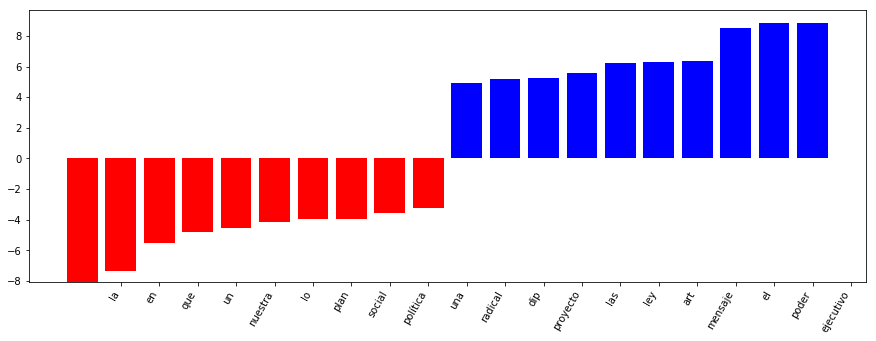

In [29]:
# https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
plot_coefficients(model_clean, feature_names, 10)


## Okay let's try this with pages
### Since the 17 + 5 = 22 observations I have when I concatenated all the OCR'd data into is not ideal, let's try building a classifier with pages as observations instead of books. Will the top 10 features for each author change when given smaller but more numerous observations?

In [30]:
speeches

Speaker,Book_Title,Page,Text
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-69,"ción, que complementaron los convenios, para ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-15,"ideales, y las antiguas promesas repetidas, con la pre— ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-12,= Ps o y © o YT p p l— pósitos que la Revolu ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-60,distintos planes crediticios del Banco Hipotecario Na— ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-67,Ella se ha desarrollado ya como teoría normativa ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-83,". Sobre este tema he expresado últimamente, en va— rias ..."
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-52,Hay que tener en cuenta que estos índices por ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-3,CAPITULO I INTRODUCCIO N ESTADO GENERAL DE LA NACION ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-29,no tiene por el momento más que dos grandes sector ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-84,"_1o) Cuando el obrero está mejor capacitado, porque ..."


In [31]:
# let's clean these speeches
clean_speeches = speeches.with_column('Cleaned Text', clean_text(speeches.column('Text'))).drop('Text')
clean_speeches

Speaker,Book_Title,Page,Cleaned Text
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-69,ción que complementaron los convenios para se ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-15,ideales y las antiguas promesas repetidas con la pre— ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-12,ps o y © o yt p p l— pósitos que la revoluc ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-60,distintos planes crediticios del banco hipotecario na— ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-67,ella se ha desarrollado ya como teoría normativa ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-83,sobre este tema he expresado últimamente en va— rias o ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-52,hay que tener en cuenta que estos índices por ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-3,capitulo i introduccio n estado general de la nacion ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-29,no tiene por el momento más que dos grandes sector ...
Peron,Mensaje al inaugurar el Congreso nacional - Conceptos Do ...,page-84,o cuando el obrero está mejor capacitado porque pr ...


In [32]:
# let's create some arrays to shuffle
speaker_pages = clean_speeches.column('Speaker')
text_pages = clean_speeches.column('Cleaned Text')
text_pages

array([ ' \r\n\r\n  \r\n\r\nción que complementaron los convenios para seguir\r\nasegurando la colocación de nuestros saldos exporta—\r\nbles abastecer al país de los productos esenciales nece—\r\nsarios y en términos justos de intercambio\r\n\r\nfomento de las exportaciones\r\n\r\nel poder eaecutvo fomento de manera especial las\r\nexportaciones de la producción manufacturera sobre\r\ntodo la de textiles y la de libros en esta gestión ac—\r\ntuaron eficientemente las organizaciones del pueblo\r\nque se interesaron en el problema\r\n\r\nel intercambio comercial con los países adheridos\r\nal acta de santiago fué siempre objeto de tratativas\r\npreferenciales como por ejemplo los convenios de in—\r\ntercambio con chile paraguay y ecuador\r\n\r\nresultados de nuestro conmncm interna—\r\n—— cional  \r\n\r\nlos resultados positivos de nuestro intercambio ex—\r\nterior fueron en  los más altos de nuestra balanza\r\n\r\ncomercml\r\n\r\n cifras del ministerío de comercio exterior eotejadas y 

In [33]:
# classifying time part 2
from sklearn.utils import shuffle

np.random.seed(0)
X_pg, y_pg = shuffle(text_pages, speaker_pages, random_state=0)

In [34]:
text_clf_pg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 3))),
                        ('tfidf', TfidfTransformer()),
                        ('clf', LogisticRegression(random_state=0, penalty='l2', C=1000))
                       ])

scores_pg = cross_val_score(text_clf_pg, X_pg, y_pg, cv=5)

print(scores_pg, np.mean(scores_pg))

[ 0.9603624   0.9614949   0.95578231  0.96371882  0.95578231] 0.959428150271


In [35]:
X_train_pg, X_test_pg, y_train_pg, y_test_pg = train_test_split(X_pg, y_pg, test_size=0.25, random_state=0)

tfidf.fit(X_pg)
X_train_pg = tfidf.transform(X_train_pg)
X_test_pg = tfidf.transform(X_test_pg)

logit_class_pg = LogisticRegression(random_state=0, penalty='l2', C=1000)
model_pg = logit_class_pg.fit(X_train_pg, y_train_pg)
model_pg.score(X_test_pg, y_test_pg)

0.97370806890299189

In [36]:
prob_estimates = model_pg.predict_proba(X_test_pg)
# we re-format the probability predictions for X into the format scikitlearn likes
prob_estimates1 = [i[0] for i in prob_estimates]
prob_estimates1

[0.99999743659966467,
 0.99928257085650996,
 0.99986409500056506,
 0.99960671200582485,
 4.5137387537419471e-05,
 0.99950888796499415,
 0.99943144959689756,
 0.995483663741074,
 0.99999934374640553,
 0.99975667348756725,
 0.99874871204048465,
 0.010309152710453073,
 0.99978447056153952,
 0.99995486958474422,
 0.021925163063898689,
 0.99901071157068266,
 0.30197339693472458,
 0.99884260526285296,
 0.99998735836019004,
 0.99992311120844779,
 0.99986040889904981,
 0.99967569590529404,
 0.00036502521725367831,
 0.96655691905958541,
 0.99826611472575777,
 0.985091323472985,
 0.99976510979333311,
 0.99990002197528971,
 0.99999063774870256,
 0.99969300985662068,
 0.99865835915698797,
 0.9998315138527869,
 0.9996183444484239,
 0.99865106469785025,
 0.99996916543178282,
 0.99928192770885582,
 0.99995527903940995,
 0.70017685348764713,
 0.99950690976510104,
 0.99999815072029297,
 0.99964391042068479,
 0.97439258645765725,
 0.99753221912290546,
 0.91067133614222218,
 0.9967844232172115,
 0.997392

In [37]:
y_test_pg

array(['Peron', 'Peron', 'Peron', ..., 'Peron', 'Yrigoyen', 'Peron'], 
      dtype='<U8')

In [38]:
# we re-formate y_test into an array of values instead of categorical variables to help sci-kit learn out
def reformat_y(array_of_authors):
    reformatted_array = make_array()
    for i in array_of_authors:
        i = i.lower()
        if i == 'peron':
            reformatted_array = np.append(reformatted_array, 1)
        if i == 'yrigoyen':
            reformatted_array = np.append(reformatted_array, -1)
    return reformatted_array

y_test_pg_formatted = reformat_y(y_test_pg)
y_test_pg_formatted

array([ 1.,  1.,  1., ...,  1., -1.,  1.])

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_pg_formatted, prob_estimates1)

0.99626235621064485

In [40]:
# let's write one huge function to do this all because I want to see how  playing with some parameters can change our answers


def classify(text_array_unclean, speakers_array, cleaning_function, testsize, random_seed, c_error):
    # input this is an array of strings that needs to  be cleaned
    text_array = cleaning_function(text_array_unclean)

    #make X and y
    X, y = shuffle(text_array, speakers_array, random_state = random_seed)
    
    # split X, y into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize, random_state = random_seed)
    
    # tfidf-ing into X_train, X_test
    tfidf.fit(X)
    X_train = tfidf.transform(X_train)
    X_test = tfidf.transform(X_test)
    
    # training model 
    logit_class = LogisticRegression(random_state = random_seed, penalty = 'l2', C = c_error)
    model = logit_class.fit(X_train, y_train)
    
    # finding top 10 features
    feature_names = tfidf.get_feature_names()
    top10yrigoyen = np.argsort(model.coef_[0])[-10:]
    print("Top features for Yrigoyen observations (speeches):")
    print(list(feature_names[j] for j in top10yrigoyen))
    print()
    print("Top features for Peron observations (speeches):")
    top10peron = np.argsort(model.coef_[0])[:10]
    print(list(feature_names[j] for j in top10peron))
    
    # making tables of features and their coefficients
    most_peron = list(feature_names[j] for j in top10peron)
    most_yrigoyen = list(feature_names[j] for j in top10yrigoyen)
    
    plot_coefficients(model, feature_names, 10)
    
    # testing with cross-val
    score = model.score(X_test, y_test)
    print('Cross-validation score:')
    print(score)
    
    # testing using roc-auc
    # working with data to use roc-auc
    prob_est = model.predict_proba(X_test)
    prob_est = [i[0] for i in prob_est]
    # formatting y_test
    y_test_formatted = reformat_y(y_test)
    # the actual roc-auc test
    roc_auc = roc_auc_score(y_test_formatted, prob_est)
    print('ROC-AUC score:')
    print(roc_auc)
    
    

Top features for Yrigoyen observations (speeches):
['radical', 'dip', 'proyecto', 'las', 'ley', 'art', 'mensaje', 'el', 'poder', 'ejecutivo']

Top features for Peron observations (speeches):
['la', 'en', 'que', 'un', 'nuestra', 'lo', 'plan', 'social', 'política', 'una']


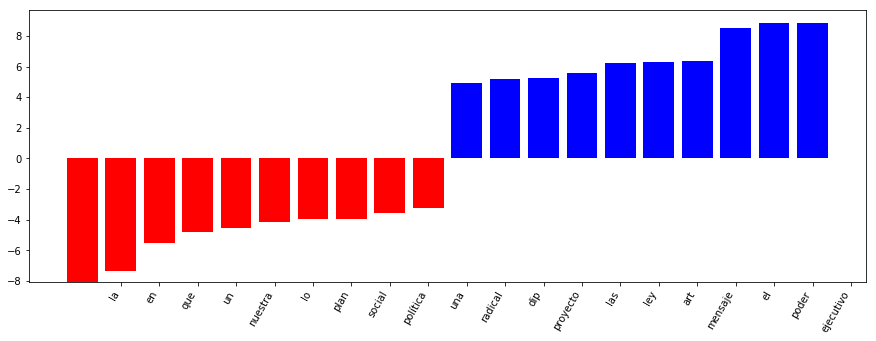

Cross-validation score:
1.0
ROC-AUC score:
1.0


In [41]:
# 1 speech = 1 obs

classify(books, authors, clean_text, 0.25, 0, 1000)

Top features for Yrigoyen observations (speeches):
['vuestra', 'anexo', 'instrucción', 'proyecto', 'notas', 'art', 'cívica', 'radical', 'mensaje', 'ejecutivo']

Top features for Peron observations (speeches):
['presidencial', 'social', 'plan', 'mediante', 'mi', 'materia', 'un', 'ministerio', 'hemos', 'organismos']


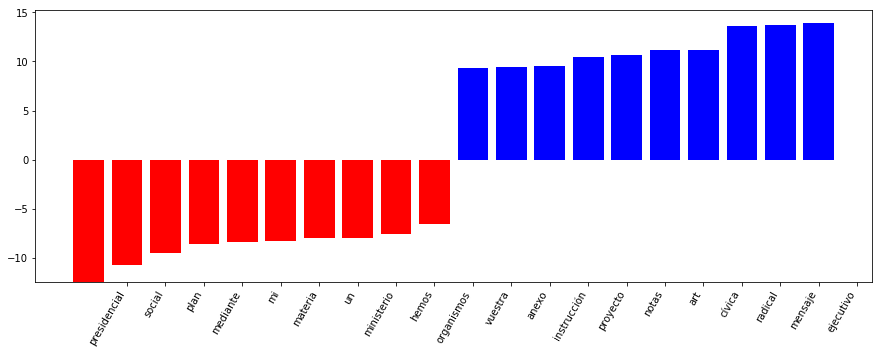

Cross-validation score:
0.973708068903
ROC-AUC score:
0.996262356211


In [42]:
# 1 page = 1 obs

classify(text_pages, speaker_pages, clean_text, 0.25, 0, 1000)

In [43]:
# a lot of the top ten features are stop words, so let's see what words we get when we clean the stop words out
# but first let's import spanish stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [44]:
def even_cleaner_text(array_of_strings):
    new_great_clean_array = make_array()
    for i in np.arange(len(array_of_strings)):
        ith_string = array_of_strings.item(i)
        # this removes only the punctuation or the digits but preserves the letters that may have been scanned
        ith_string = ''.join(i for i in ith_string if not i.isdigit())
        ith_string = ''.join(i for i in ith_string if i not in punctuation)
        # this makes everything lowercase 
        ith_string = ith_string.lower()
        # this removes any complete words that I want discarded (see above previous clean_text function for 
        # words_we_discard array)
        ith_string = ith_string.replace('argentina', '').replace('yrigoyen', '').replace('perón', '').replace('hipólito', '')
        # that all before was the same as the original clean_text function. 
        # here we clean out the stop words 
        ith_array = ith_string.split()
        ith_array = [word for word in ith_array if word not in stop_words]
        ith_string = ' '.join(ith_array)
        new_great_clean_array = np.append(new_great_clean_array, ith_string)
    return new_great_clean_array

dirty_array = make_array('alskfjal', 'argentina', 'yrigoyen so smart boy', 's82381u3r!!9289', 'ellos que hacen')
even_cleaner_text(dirty_array)

array(['alskfjal', '', 'so smart boy', 'sur', 'hacen'], 
      dtype='<U32')

Top features for Yrigoyen observations (speeches):
['cám', 'setiembre', 'radical', 'dip', 'proyecto', 'ley', 'mensaje', 'art', 'poder', 'ejecutivo']

Top features for Peron observations (speeches):
['política', 'social', 'si', 'pueblo', 'plan', 'país', 'constitución', 'producción', 'económica', 'mundo']


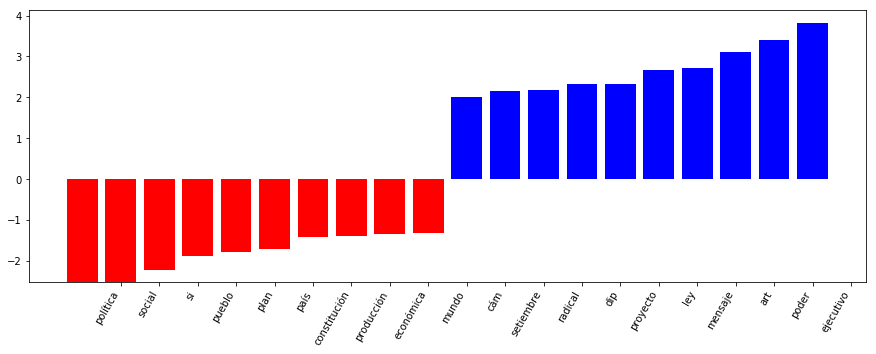

Cross-validation score:
1.0
ROC-AUC score:
1.0


In [45]:
# 1 speech = 1 obs, stop words removed

classify(books, authors, even_cleaner_text, 0.25, 0, 1000)

Top features for Yrigoyen observations (speeches):
['anexo', 'por', 'proyecto', 'honorabilidad', 'notas', 'art', 'cívica', 'mensaje', 'radical', 'ejecutivo']

Top features for Peron observations (speeches):
['presidencial', 'social', 'plan', 'ministerio', 'materia', 'mediante', 'hombres', 'patria', 'política', 'etcétera']


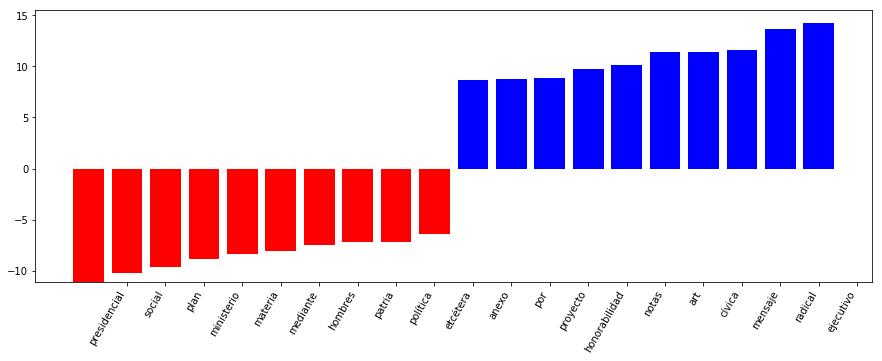

Cross-validation score:
0.973708068903
ROC-AUC score:
0.996364958197


In [46]:
# 1 page = 1 obs, stop words removed

classify(text_pages, speaker_pages, even_cleaner_text, 0.25, 0, 1000)